In [25]:
library(evd)
library(ggplot2)
library(GGally)
library(maxstablePCA)

In [13]:
f1 <- function(z) 2 - 2 * z
f2 <- function(z) 2 * z
f3 <- function(z) ifelse(abs(z - 1/2) < 1/4, 2, 0)

In [18]:
e <- runif(1000)
R <- rgpd(1000, shape = 1)

Theta <- matrix(c(f1(e), f2(e), f3(e)), 1000, 3)

In [15]:
f3(e)

[1] 2 2 0 0 2 0 2 2 2 0 0 2 0 2 2 0 0 0 2 2 0 0 2 2 0 2 2 0 0 2 2 2 0 2 2 2 0
  [38] 2 0 0 2 2 2 0 2 2 0 2 2 2 2 0 2 0 0 0 0 0 0 2 0 2 2 2 2 2 0 0 2 2 0 2 2 0
  [75] 0 2 0 0 2 0 2 0 0 2 2 2 2 0 2 0 0 2 0 0 2 0 0 2 0 2 2 2 0 2 2 2 0 0 0 0 0
 [112] 2 0 2 0 2 2 0 2 2 2 0 2 0 0 2 0 0 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 2 0 0 2 2
 [149] 2 0 2 2 0 0 2 2 0 0 0 2 0 0 2 0 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 2
 [186] 2 0 0 0 2 2 0 0 0 0 2 0 0 2 0 2 2 2 0 2 2 2 0 0 2 2 0 2 0 2 2 2 0 2 2 2 2
 [223] 2 2 2 0 0 0 0 2 0 0 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 0 2 2 0 0 2 0 0 2 0
 [260] 2 2 2 0 0 0 2 2 0 2 2 2 2 0 0 0 2 2 0 0 0 0 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2
 [297] 0 2 0 2 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 2 2 0 2
 [334] 0 0 2 2 2 2 2 2 2 0 2 0 2 0 0 0 2 0 2 0 2 0 0 0 2 2 2 0 2 0 0 0 0 0 2 0 2
 [371] 2 0 0 0 2 0 2 0 0 0 2 2 2 0 0 2 0 2 2 0 0 2 2 0 2 2 0 0 2 0 2 2 2 0 0 2 0
 [408] 0 0 0 0 0 0 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 0 2 2 2 2 0 0 0 2 0 2 2 0 0
 [445] 0 2 2 0 2 0 0 2 0 2 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0 2
 [482] 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 0 0 0 0 0 0 2 2 2 0 2 0 0 2 2 2 0 0
 [519] 0 2 0 0 2 0 0 0 2 0 0 2 0 0 0 0 2 0 2 2 2 2 2 2 2 0 2 2 0 0 0 2 0 2 0 2 0
 [556] 2 0 2 2 0 2 0 2 0 2 2 0 2 0 2 2 2 2 2 2 0 2 2 2 0 0 2 0 2 2 0 2 0 0 0 0 2
 [593] 0 2 0 2 2 2 0 0 0 2 2 0 0 0 2 2 0 0 0 2 0 2 2 2 2 0 2 2 0 2 0 2 0 2 2 0 2
 [630] 2 0 0 0 0 2 2 0 0 0 2 0 2 2 0 2 2 2 2 0 0 2 0 0 0 2 2 2 0 2 0 2 2 0 0 0 0
 [667] 0 0 2 0 2 2 0 2 2 0 0 2 2 0 0 0 0 2 0 0 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 2 2
 [704] 0 0 2 0 0 0 0 2 0 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 2 0 2
 [741] 2 0 0 2 0 2 2 0 0 2 2 2 2 0 2 0 2 0 2 0 2 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 2
 [778] 0 2 0 2 0 0 0 2 0 0 0 0 0 2 0 0 2 2 2 2 2 0 0 2 0 2 2 0 0 0 0 0 2 0 2 2 0
 [815] 2 0 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 0 2 2 0 0 2 2 2 0 2 2 0 0 2 2 0 2
 [852] 0 0 2 2 2 0 0 2 0 2 2 0 0 2 2 2 2 2 0 0 0 0 2 2 0 2 0 2 2 2 0 0 2 2 2 2 0
 [889] 0 2 0 2 0 0 2 2 0 0 0 2 2 2 2 0 0 0 0 2 0 2 2 2 2 0 0 0 0 2 0 2 0 0 2 2 2
 [926] 0 2 2 2 0 2 0 0 0 0 0 0 2 2 0 0 0 2 2 0 0 2 2 0 0 0 0 0 0 2 2 2 0 2 0 0 2
 [963] 0 0 0 0 2 0 0 2 2 0 2 2 2 0 0 2 2 0 2 0 2 0 0 2 0 0 2 2 2 0 2 0 0 2 0 0 2
[1000] 2

In [19]:
summary(Theta)

       V1                 V2                 V3       
 Min.   :0.003598   Min.   :0.001059   Min.   :0.000  
 1st Qu.:0.514571   1st Qu.:0.473937   1st Qu.:0.000  
 Median :1.013107   Median :0.986893   Median :0.000  
 Mean   :1.017975   Mean   :0.982025   Mean   :0.992  
 3rd Qu.:1.526063   3rd Qu.:1.485429   3rd Qu.:2.000  
 Max.   :1.998941   Max.   :1.996402   Max.   :2.000  

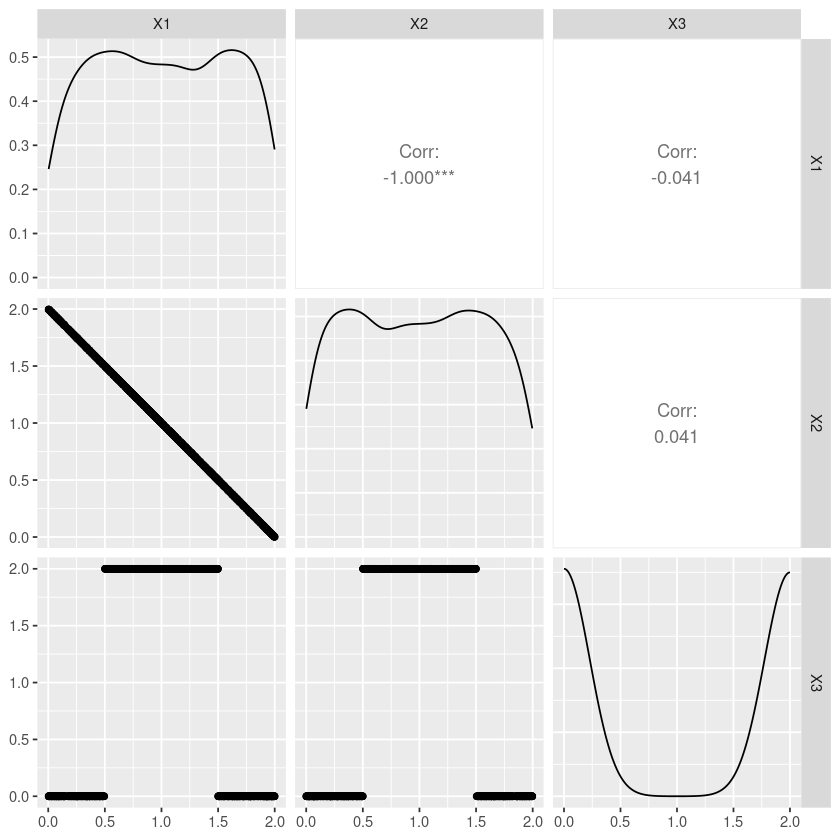

In [20]:
ggpairs(data.frame(Theta))

In [21]:
X <- diag(R) %*% Theta

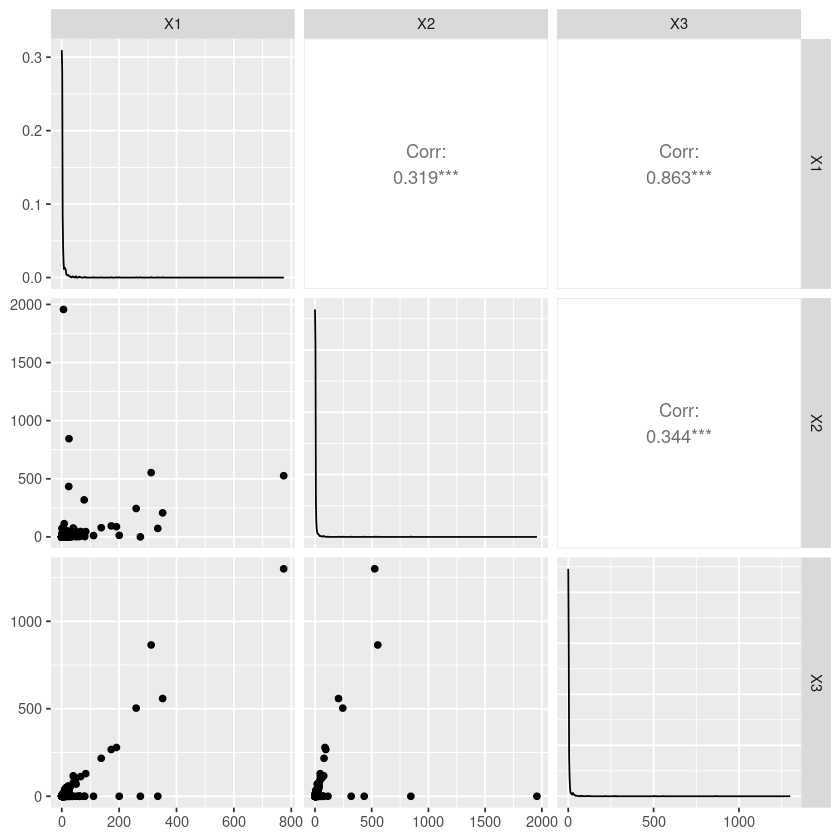

In [23]:
ggpairs(data.frame(X))

In [34]:
A <- matrix(runif(30), 10, 3)
A

0.8920660,0.8922449,0.6678236690
0.8164455,0.2898273,0.0002802291
0.4383767,0.5738879,0.4433275012
0.3358009,0.9524787,0.7651578849
0.4787384,0.8565310,0.8503181699
0.9656883,0.1879140,0.1885943522
0.4187203,0.5517202,0.9060653904
0.9131797,0.8413544,0.3918537661
0.4309436,0.4417270,0.4305641446
0.6232016,0.2826858,0.9452015916


In [35]:
Y1 <- t(A %*% t(X))
Y2 <- t(maxmatmulC(A, t(X)))

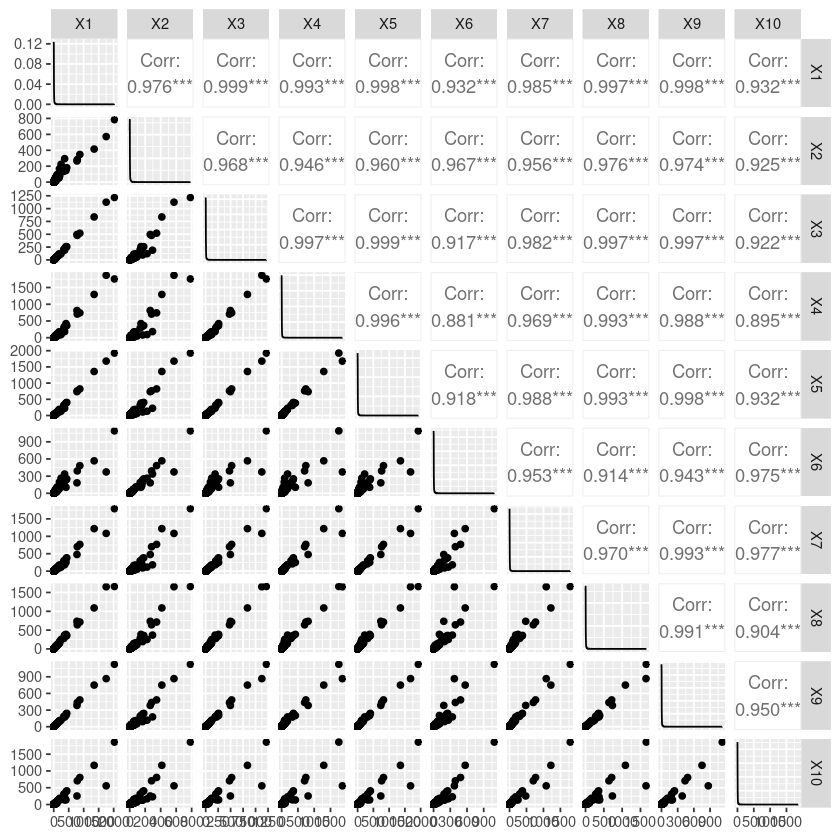

In [36]:
ggpairs(data.frame(Y1))

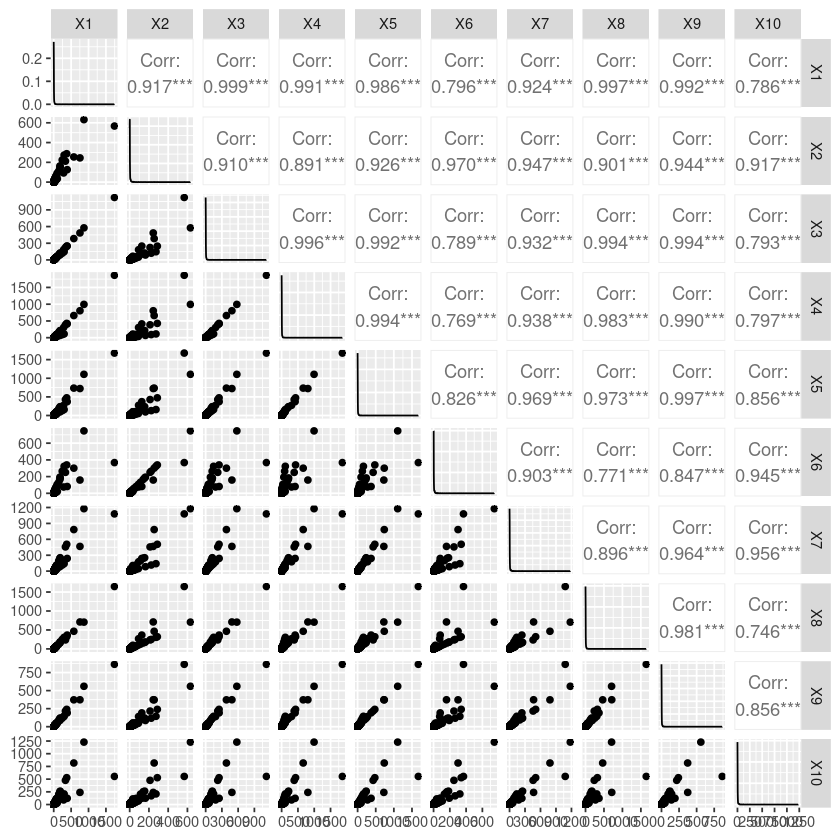

In [37]:
ggpairs(data.frame(Y2))

# An idea to fit general factor models in the heavy tailed case

Let $X$ be a $p$-variate mrv random vector with spectral measure $S$ and $M$ be a matrix. Then for 

$Y = M X$

with the matrix product either being tropical or the normal matrix vector product, 
how can we fit such models to data, if $M \in \mathbb R^{d \times p}$ with $d >> p$? 

For $Y_1, \ldots Y_n$ i.i.d. copies of $Y$, we can estimate the spectral measure by the classic nonparametric estimator and if we want to fit the above model, we can minimize

$\min_{S, M} \inf_{S = \Pi(S_n, S_Y)} \int c(x,y) S(dx, dy)$

note that 
$S_y(A) = \int 1_A(\frac {Ma}{\| Ma\|}) \| Ma \| S(da),$

so for sets $A_1 \times A_2$ the couplings are of the form  

$\tilde S(A_1, A_2) = \frac 1 k \sum_{i=1}^n 1_{(\frac n k, \infty)}(\| X_i \|) 1_